# 13  Coordinate Reference Systems

## Setting CRS on `.csv`

## Dataset 1:

From the US Energy Information Administration (EIA).

Info about current operable electric power plants in the US by energy source


## Dataset 2:
TIGER shapefiles
From the US Census Bureau depicting state boundaries

In [37]:
# import necessary libraries
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# update pandas display option
pd.set_option("display.max.columns", None)

We want to make a geopandas geodataframe from our csv data.

In [2]:
# import csv data using pandas

power_plants = pd.read_csv('data/power_plants_epsg4269.csv')

In [3]:
power_plants.head()

,Unnamed: 0,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude
0,0.0,11570,1,Sand Point,63560,"TDX Sand Point Generating, LLC",Electric Utility,100 Power Plant Way,Sand Point,Aleutians East,Alaska,99661.0,petroleum,"Petroleum = 1.3 MW, Wind = 0.4 MW",Petroleum Liquids; Onshore Wind Turbine;,3.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,0.4,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-160.497222,55.339722
1,1.0,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665
2,2.0,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900
3,3.0,11573,4,Walter Bouldin Dam,195,Alabama Power Co,Electric Utility,750 Bouldin Dam Road,Wetumpka,Elmore,Alabama,36092.0,hydroelectric,Hydroelectric = 224.1 MW,Conventional Hydroelectric,225.0,224.1,NaN,NaN,NaN,NaN,224.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-86.283056,32.583889
4,4.0,11574,9,Copper,5701,El Paso Electric Co,Electric Utility,651 Hawkins Blvd.,El Paso,El Paso,Texas,79915.0,natural gas,Natural Gas = 63 MW,Natural Gas Fired Combustion Turbine,86.9,63.0,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-106.375000,31.756900


From the "documentation" (aka Carmen telling us), we know that the CRS for this file is EPSG:4269 in lat/long coordinates.


We can use this information to create a new `gpd.GeoDataFrame` from the `pd.DataFrame`.

To do this, we use the `gpd.points_from_xy` function



In [4]:
power_plants = gpd.GeoDataFrame( power_plants, # data for geo-dataFrame
                                # specify/create a geometry column
                                geometry = gpd.points_from_xy(power_plants.longitude,
                                                              power_plants.latitude),
                                # specify CRS
                                crs='EPSG:4269'
                               )

power_plants.head()

,Unnamed: 0,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude,geometry
0,0.0,11570,1,Sand Point,63560,"TDX Sand Point Generating, LLC",Electric Utility,100 Power Plant Way,Sand Point,Aleutians East,Alaska,99661.0,petroleum,"Petroleum = 1.3 MW, Wind = 0.4 MW",Petroleum Liquids; Onshore Wind Turbine;,3.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,0.4,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-160.497222,55.339722,POINT (-160.49722 55.33972)
1,1.0,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665,POINT (-87.35682 33.45867)
2,2.0,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900,POINT (-88.01030 31.00690)
3,3.0,11573,4,Walter Bouldin Dam,195,Alabama Power Co,Electric Utility,750 Bouldin Dam Road,Wetumpka,Elmore,Alabama,36092.0,hydroelectric,Hydroelectric = 224.1 MW,Conventional Hydroelectric,225.0,224.1,NaN,NaN,NaN,NaN,224.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-86.283056,32.583889,POINT (-86.28306 32.58389)
4,4.0,11574,9,Copper,5701,El Paso Electric Co,Electric Utility,651 Hawkins Blvd.,El Paso,El Paso,Texas,79915.0,natural gas,Natural Gas = 63 MW,Natural Gas Fired Combustion Turbine,86.9,63.0,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-106.375000,31.756900,POINT (-106.37500 31.75690)


In [5]:
type(power_plants)

geopandas.geodataframe.GeoDataFrame

In [8]:
power_plants.columns
# we now have a geometry column!

Index(['Unnamed: 0', 'objectid', 'plant_code', 'plant_name', 'utility_id',
       'utility_name', 'sector_name', 'street_address', 'city', 'county',
       'state', 'zip', 'primsource', 'source_desc', 'tech_desc', 'install_mw',
       'total_mw', 'bat_mw', 'bio_mw', 'coal_mw', 'geo_mw', 'hydro_mw',
       'hydrops_mw', 'ng_mw', 'nuclear_mw', 'crude_mw', 'solar_mw', 'wind_mw',
       'other_mw', 'source', 'period', 'longitude', 'latitude', 'geometry'],
      dtype='object')

In [6]:
gpd.points_from_xy(power_plants.longitude,power_plants.latitude)

<GeometryArray>
[ <POINT (-160 55.3)>, <POINT (-87.4 33.5)>,     <POINT (-88 31)>,
 <POINT (-86.3 32.6)>,  <POINT (-106 31.8)>, <POINT (-87.8 32.6)>,
 <POINT (-86.1 33.8)>, <POINT (-87.4 33.3)>, <POINT (-86.3 32.6)>,
 <POINT (-86.3 33.4)>,
 ...
 <POINT (-80.1 35.4)>, <POINT (-77.9 35.4)>, <POINT (-78.1 35.3)>,
 <POINT (-78.1 35.3)>, <POINT (-80.7 35.6)>, <POINT (-82.4 35.4)>,
   <POINT (-79.4 36)>, <POINT (-79.7 35.3)>, <POINT (-73.9 42.9)>,
 <POINT (-77.3 41.8)>]
Length: 12009, dtype: geometry

Let's check information about our CRS

In [10]:
# print CRS info
print('is geographic?', power_plants.crs.is_geographic)

is geographic? True


In [14]:
print('is projected? ', power_plants.crs.is_projected)
# redundant because it's a geographic CRS, then you need to project it to get a projected CRS
# choose your projection to make your map, make analysis about distances etc.
print('datum: ', power_plants.crs.datum)
print('ellipsoid: ', power_plants.crs.ellipsoid)

is projected?  False
datum:  North American Datum 1983
ellipsoid:  GRS 1980


In [13]:
power_plants.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [17]:
# import tiger data
states = gpd.read_file('data/tl_2022_us_state/tl_2022_us_state.shp')

In [18]:
states.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206244837557,18937184315,+46.3159573,-094.1996043,"POLYGON ((-95.31989 48.99892, -95.31747 48.998..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151771744,6979295311,+38.9466584,-076.6744939,"POLYGON ((-75.75600 39.24607, -75.75579 39.243..."


In [19]:
# reassign the column names: .str.lower() makes them lower case
states.columns = states.columns.str.lower()
print(states.columns)

Index(['region', 'division', 'statefp', 'statens', 'geoid', 'stusps', 'name',
       'lsad', 'mtfcc', 'funcstat', 'aland', 'awater', 'intptlat', 'intptlon',
       'geometry'],
      dtype='object')


In [26]:
states.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   region    56 non-null     object  
 1   division  56 non-null     object  
 2   statefp   56 non-null     object  
 3   statens   56 non-null     object  
 4   geoid     56 non-null     object  
 5   stusps    56 non-null     object  
 6   name      56 non-null     object  
 7   lsad      56 non-null     object  
 8   mtfcc     56 non-null     object  
 9   funcstat  56 non-null     object  
 10  aland     56 non-null     int64   
 11  awater    56 non-null     int64   
 12  intptlat  56 non-null     object  
 13  intptlon  56 non-null     object  
 14  geometry  56 non-null     geometry
dtypes: geometry(1), int64(2), object(12)
memory usage: 6.7+ KB


In [28]:
# reclassifying region column to be int
states.region = states.region.astype('int64')
# reclassifying division column to be type int
states.division = states.division.astype('int64')
# reclassifying statefp to be int
states.statefp = states.statefp.astype('int64')
states.info()

dtype('int64')

In [33]:
states.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [34]:
print('is projected? ', states.crs.is_projected)

is projected?  False


In [36]:
states.crs == power_plants.crs
# yes, crs are the same

True

<AxesSubplot:>

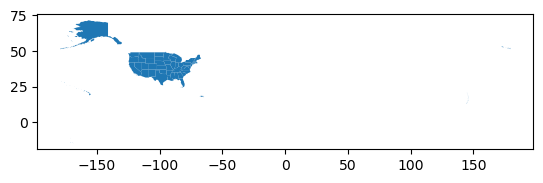

In [38]:
states.plot()

The bounds of the crs are causing the extensive plotting

In [39]:
states.statefp

0     54
1     12
2     17
3     27
4     24
5     44
6     16
7     33
8     37
9     50
10     9
11    10
12    35
13     6
14    34
15    55
16    41
17    31
18    42
19    53
20    22
21    13
22     1
23    49
24    39
25    48
26     8
27    45
28    40
29    47
30    56
31    15
32    38
33    21
34    78
35    69
36    66
37    23
38    36
39    32
40     2
41    60
42    26
43     5
44    28
45    29
46    30
47    20
48    18
49    72
50    46
51    25
52    51
53    11
54    19
55     4
Name: statefp, dtype: int64

In [40]:
states.head()

,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206244837557,18937184315,+46.3159573,-094.1996043,"POLYGON ((-95.31989 48.99892, -95.31747 48.998..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151771744,6979295311,+38.9466584,-076.6744939,"POLYGON ((-75.75600 39.24607, -75.75579 39.243..."


In [43]:
states.region.unique()
# region 9 is an unwanted value

array([3, 2, 1, 4, 9])

Data preparation

In [44]:
state_regions = [1, 2, 3, 4]

states = states[states.region.isin(state_regions)].copy()
states

,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206244837557,18937184315,+46.3159573,-094.1996043,"POLYGON ((-95.31989 48.99892, -95.31747 48.998..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151771744,6979295311,+38.9466584,-076.6744939,"POLYGON ((-75.75600 39.24607, -75.75579 39.243..."
5,1,1,44,01219835,44,RI,Rhode Island,00,G4000,A,2677763373,1323686975,+41.5964850,-071.5264901,"MULTIPOLYGON (((-71.67881 41.15891, -71.67626 ..."
6,4,8,16,01779783,16,ID,Idaho,00,G4000,A,214049908397,2391592787,+44.3484222,-114.5588538,"POLYGON ((-116.35844 49.00047, -116.34805 49.0..."
7,1,1,33,01779794,33,NH,New Hampshire,00,G4000,A,23190126218,1025960758,+43.6726907,-071.5843145,"POLYGON ((-70.83887 43.24449, -70.83886 43.244..."
8,3,5,37,01027616,37,NC,North Carolina,00,G4000,A,125935585728,13453835222,+35.5397100,-079.1308636,"POLYGON ((-77.89977 36.54460, -77.89942 36.544..."
9,1,1,50,01779802,50,VT,Vermont,00,G4000,A,23872569964,1030754610,+44.0589536,-072.6710173,"POLYGON ((-72.04187 44.15665, -72.04180 44.156..."


In [46]:
# checking output
states.region.unique()
# yay

array([3, 2, 1, 4])

<AxesSubplot:>

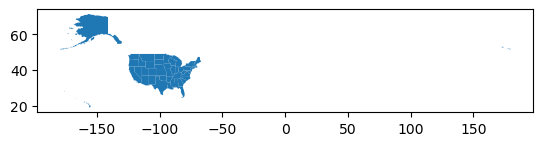

In [47]:
states.plot()

In [50]:
states[states.statefp == 2]

,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
40,4,9,2,01785533,02,AK,Alaska,00,G4000,A,1478943541175,245377731557,+63.3473560,-152.8397334,"MULTIPOLYGON (((-179.23023 51.28393, -179.2256..."


In [51]:
states[states.name == 'Hawaii']

,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
31,4,9,15,01779782,15,HI,Hawaii,00,G4000,A,16634257696,11777541585,+19.8281671,-155.4950421,"MULTIPOLYGON (((-164.76481 23.58172, -164.7634..."


In [61]:
subset = states.drop(labels=[31,40])

<AxesSubplot:>

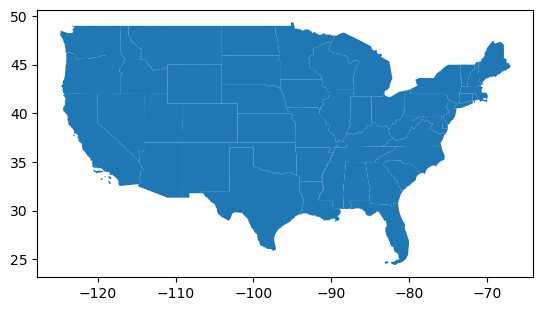

In [62]:
subset.plot()

In [77]:
power_plants[power_plants.state == 'Hawaii']

,Unnamed: 0,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude,geometry
423,423.0,11993,765,Kahe,19547,Hawaiian Electric Co Inc,Electric Utility,92-200 Farrington Hwy,Kapolei,Honolulu,Hawaii,96707.0,petroleum,Petroleum = 582.1 MW,Petroleum Liquids,609.7,582.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,582.1,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-158.128848,21.356399,POINT (-158.12885 21.35640)
424,424.0,11994,766,Waiau,19547,Hawaiian Electric Co Inc,Electric Utility,475 Kamehamenha Hwy,Pearl City,Honolulu,Hawaii,96782.0,petroleum,Petroleum = 456.6 MW,Petroleum Liquids,474.6,456.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.6,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-157.961513,21.389001,POINT (-157.96151 21.38900)
425,425.0,11995,768,Waimea,8287,Hawaii Electric Light Co Inc,Electric Utility,66-1591 Kawaihae Road,Kamuela,Hawaii,Hawaii,96743.0,petroleum,Petroleum = 7.5 MW,Petroleum Liquids,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.5,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-155.695495,20.025204,POINT (-155.69550 20.02520)
426,426.0,11996,769,Kanoelehua,8287,Hawaii Electric Light Co Inc,Electric Utility,54 Halekauila Street,Hilo,Hawaii,Hawaii,96720.0,petroleum,Petroleum = 20 MW,Petroleum Liquids,21.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-155.062495,19.705204,POINT (-155.06250 19.70520)
427,427.0,11997,771,Puueo,8287,Hawaii Electric Light Co Inc,Electric Utility,117 Wainaku Avenue,Hilo,Hawaii,Hawaii,96720.0,hydroelectric,Hydroelectric = 3.1 MW,Conventional Hydroelectric,3.1,3.1,NaN,NaN,NaN,NaN,3.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-155.090795,19.726404,POINT (-155.09080 19.72640)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9818,9817.0,21387,63280,"AES Kekaha Solar, LLC Hybrid",61012,AES Distributed Energy,IPP Non-CHP,Tarter Drive,Kekaha,Kauai,Hawaii,96752.0,solar,"Battery = 14 MW, Solar = 14 MW",Batteries; Solar Photovoltaic;,28.0,28.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-159.762094,22.000604,POINT (-159.76209 22.00060)
10323,10322.0,21892,63900,AES Waikoloa Solar Hybrid,61012,AES Distributed Energy,IPP Non-CHP,TBD,Waikoloa Village,Hawaii,Hawaii,96738.0,solar,"Battery = 30 MW, Solar = 30 MW",Batteries; Solar Photovoltaic;,60.0,60.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-155.763995,19.902004,POINT (-155.76400 19.90200)
10567,10566.0,22136,64190,Waipio Peninsula,63804,"Pacific Energy Solutions, LLC",IPP Non-CHP,9365 Waipio Point Access Road,Waipio,Honolulu,Hawaii,96797.0,solar,Solar = 10.2 MW,Solar Photovoltaic,11.0,10.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.2,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-157.985589,21.363518,POINT (-157.98559 21.36352)
10725,10724.0,22294,64400,BYU - Hawaii,63432,SkyHigh 2 Solar,Commercial Non-CHP,55-220 Kulaniui Street,Laie,Honolulu,Hawaii,96762.0,solar,"Battery = 1.9 MW, Solar = 3.1 MW",Batteries; Solar Photovoltaic;,5.0,5.0,1.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.1,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-157.925051,21.640778,POINT (-157.92505 21.64078)


In [84]:
power_no_hawaii = power_plants.drop(power_plants[power_plants.state == 'Hawaii'].index)

In [89]:
#power_plants.state == power_no_hawaii.state

In [90]:
power_final = power_plants.drop(power_plants[power_plants.state == 'Alaska'].index)

<AxesSubplot:>

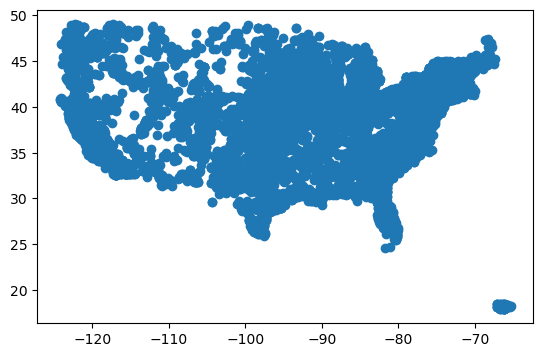

In [91]:
power_final.plot()